# Introduction 

## Goal.
The goal of this lab is to familiarize yourself with some advanced forms of evolutionary computation (EC). In particular, you will explore the use of multi-objective evolutionary algorithms to find the optimal trade-off solutions of problems with multiple objectives.

Note once again that, unless otherwise specified, in this module's exercises we will use real-valued genotypes and that the aim of the algorithms will be to *minimize* all fitness functions $f_i(\mathbf{x})$, i.e. lower values correspond to a better fitness!

## Exercise 1

In this first exercise, you will explore the optimization of multiple objectives. Before you begin using multi-objective evolutionary algorithms you will first experiment with turning multi-objective problems into single-objective problems so that you may employ a standard Genetic Algorithm (such as was used earlier in the course). One way that multiple objectives may be combined into a single-objective is by combining the objectives in a weighted sum.

By default, this exercise will try to optimize the 2-objective __[Kursawe benchmark problem](http://pythonhosted.org/inspyred/reference.html\#inspyred.benchmarks.Kursawe)__ with a GA by additively combining the two objectives with equal weights. Please note that the Kursawe benchmark problem is scalable in the number of variables (although it's normally tested with 3 variables, e.g. the 2-D Pareto Front you'll see on the *inpsyred* web-page refers to a 3-variables version of this problem), therefore you should set the number of variables to 2 or more (see the comments in the script).

You will first see this combined fitness function plotted over evolutionary time (best and mean), and then (if you set the number of variables equal to 2) you will see the initial and final populations (left and right, respectively) plotted on top of heatmaps depicting objective 1 (top) and objective 2 (bottom):
- What happens when you run the GA with this fitness function?
- Why do you obtain this result? (Hint: pay attention to the relative scaling of the two objectives!)


Try altering the fitness weights to give the first objective greater importance.

-  What happens if you give the first (or second) objective all of the weight?
- Can you find a weighting able to find a solution that approaches the optimum on both objectives? 


Try this out on a different problem (e.g. the __[DTLZ7 benchmark](http://pythonhosted.org/inspyred/reference.html\#inspyred.benchmarks.DTLZ7)__, you can change the problem by changing the parameter *problem* in the script) and/or try increasing the dimensionality of the Kursawe problem (change the variable `num_vars` in the script). Please note that the DTLZ7 benchmark problem is scalable in the number of variables and objectives (although it's normally tested with a number of variables equal to the number of objectives + 19, and a number of objectives equal to 3, e.g. the 3-D Pareto Front you'll see on the *inpsyred* web-page refers to a 22-variables and 3-objectives version of this problem), therefore you should set those parameters accordingly (see the comments in the script).


- Does your weighting still work on the new problem? (NOTE: The size of the array `args["fitness_weights"]` must be the same as the number of objectives.)
- Can you think of a method for combining the objectives that might work better than using a weighted sum? (NOTE: If you want to try your idea out, edit the `init` method of `CombinedObjectives`).

Best Individual [0.830764149603814, 0.8053076975818848, 0.0, 0.0, 0.0, 0.0, 0.1797136947502999, 0.15107658295574986, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.074785020619873, 0.0, 0.0, 0.0, 0.0]
Best Fitness 1.0901733809374754


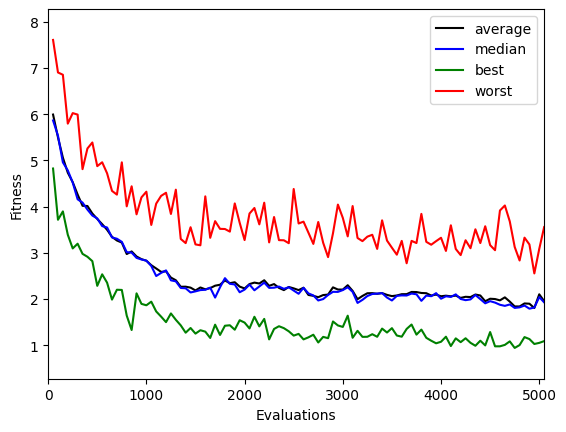

In [2]:
import sys
from pylab import *

from inspyred import benchmarks
from inspyred.ec import Bounder
from inspyred.ec.emo import Pareto

from utils.utils_04 import multi_objective
from utils.utils_04.inspyred_utils import *
from utils.utils_04.inspyred_utils import NumpyRandomWrapper

class CombinedObjectives(Pareto):
    def __init__(self, pareto, args):
        """ edit this function to change the way that multiple objectives
        are combined into a single objective
        
        """
        
        Pareto.__init__(self, pareto.values)
        if "fitness_weights" in args :
            weights = asarray(args["fitness_weights"])
        else : 
            weights = asarray([1 for _ in pareto.values])
        
        weighted_values = asarray(pareto.values) * weights
        threshold = 0.5
        weighted_values[weighted_values < threshold] = 0
        self.fitness = sum(weighted_values)
        
    def __lt__(self, other):
        return self.fitness < other.fitness

"""
-------------------------------------------------------------------------
Edit this part to do the exercises

Try different methods of combining multiple objectives into a single objective
    (1) additive
    (2) multiplicative

Try using different weights for combining the objectives in both cases, and try
this on different fitness functions.

"""
import matplotlib.pyplot as plt
display = True # Plot initial and final populations
num_vars = 2 # set 3 for Kursawe, set to 19+num_objs for DTLZ7
num_objs = 3 # used only for DTLZ7
num_vars = 19+num_objs

# parameters for the GA
args = {}
args["pop_size"] = 50
args["max_generations"] = 100

# make sure that this array has the same size as num_objs
# args["fitness_weights"] = [0.755, 0.245]
args["fitness_weights"] = [0.33, 0.33, 0.33]

# problem = benchmarks.Kursawe(num_vars) # set num_vars = 3
problem = benchmarks.DTLZ7(num_vars,num_objs) # set num_objs = 3 and num_vars = 19+num_objs

"""
-------------------------------------------------------------------------
"""

args["fig_title"] = 'GA'

seed = None
rng = NumpyRandomWrapper(seed)

best_individual, best_fitness = multi_objective.run_ga(rng, problem, CombinedObjectives, 
                                    display=display, num_vars=num_vars, 
                                    **args)

print("Best Individual", best_individual)
print("Best Fitness", best_fitness)

if display:    
    plt.show()

## Exercise 2

In this exercise you will use the Non-dominated Sorting Genetic Algorithm-II (NSGA2)$^{[1]}$ to evolve not just a single optimum but to find the **Pareto-set** of non-dominated solutions.
Recall that one solution Pareto-dominates another if it is no-worse on all objectives and it is better on at least one-objective.

This will again try to optimize the 2-objective Kursawe benchmark problem, but now using the multi-objective algorithm.

- How do the solutions you find here compare to those found in exercise 1?
- Is there a single solution that is clearly the best?

Now, try the more difficult DTLZ7 problem (or, alternatively, one of the other benchmark problems available in `inspyred` (see [link](https://pythonhosted.org/inspyred/reference.html\#multi-objective-benchmarks) for a list of multi-objective benchmark problems).

- Can you still find good solutions?
- What happens if you increase the population size (change the variable `args[pop_size]` in the script) or the number of generations (see the parameter `args[max_generations]`?

Finally, it may aid your intuition to try building up new problems out of single-objective benchmark problems. This may be done by creating a `MyBenchmark` instance with a list of single-objective benchmarks (see [link](https://pythonhosted.org/inspyred/reference.html\#single-objective-benchmarks) for a list of single-objective benchmark problems). You can add as many objectives as you like, but the Pareto-front won't be plotted with more than two objectives.

---

[1]:
Deb, K., Pratap, A., and Agarwal, S. A fast and elitist multi-objective genetic algorithm: NSGA2. IEEE Transactions on Evolutionary Computation 6.2 (2002): 149172


Final Population Fitnesses
 [[0.         0.15160583 6.40245377]
 [0.         0.         6.6634527 ]
 [0.88958761 0.69814401 4.0411168 ]
 [0.85176694 0.79396457 3.22752659]
 [0.67258364 0.91159461 4.37360787]
 [0.32500435 0.76884207 4.87756025]
 [0.09899905 0.62670951 6.0089321 ]
 [0.60157635 0.08961282 6.02716416]
 [0.76308999 0.40101878 4.99503878]
 [0.86013932 0.79241521 3.29385905]
 [0.83048133 0.77994909 3.46436494]
 [0.00946888 0.8124038  5.13554432]
 [0.         0.04333851 6.51486311]
 [0.7911793  0.32418356 4.66047938]
 [0.01352073 0.1627024  6.33484222]
 [0.27823133 0.13391013 5.79118405]
 [0.1486045  0.78275222 4.7294326 ]
 [0.80513931 0.77507921 3.69061686]
 [0.19793544 0.19106411 5.72568645]
 [0.12885165 0.20306125 5.95850574]
 [0.74307408 0.77165899 3.94763561]
 [0.16150216 0.72542784 5.23140633]
 [0.67695908 0.39211428 5.57190716]
 [0.07025081 0.02658411 6.4526816 ]
 [0.75517218 0.71795087 4.21937601]
 [0.84503486 0.23063856 4.46176799]
 [0.81554531 0.76255954 3.62218036]

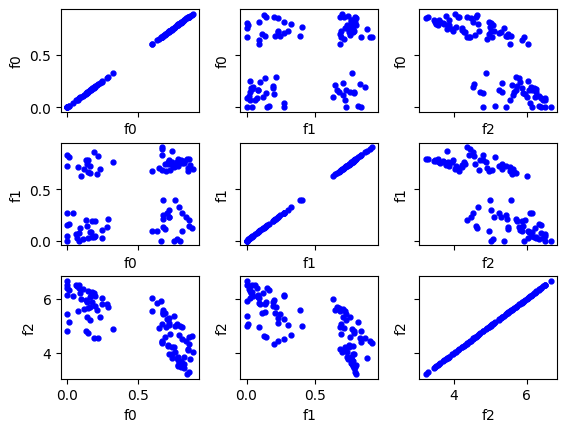

In [3]:
class MyBenchmark(benchmarks.Benchmark):
    
    def __init__(self, dimensions=2, objectives=[benchmarks.Sphere]):
        benchmarks.Benchmark.__init__(self, dimensions, len(objectives))
        self.bounder = Bounder([-5.0] * self.dimensions, [5.0] * self.dimensions)
        self.maximize = False
        self.evaluators = [cls(dimensions).evaluator for cls in objectives]
    
    def generator(self, random, args):
        return [random.uniform(-5.0, 5.0) for _ in range(self.dimensions)]
        
    def evaluator(self, candidates, args):
        fitness = [evaluator(candidates, args) for evaluator in self.evaluators]
        return list(map(Pareto, zip(*fitness)))
    
""" 
-------------------------------------------------------------------------
Edit this part to do the exercises

"""

display = True# Plot initial and final populations
num_vars =3#2 # set 3 for Kursawe, set to 19+num_objs for DTLZ7
num_objs = 3 # used only for DTLZ7
num_vars = 19+num_objs

# parameters for NSGA-2
args = {}
args["pop_size"] = 100
args["max_generations"] = 100

# problem = benchmarks.Kursawe(num_vars) # set num_vars = 3
problem = benchmarks.DTLZ7(num_vars,num_objs) # set num_objs = 3 and num_vars = 19+num_objs

#problem = MyBenchmark(num_vars, [benchmarks.Rastrigin, benchmarks.Schwefel] )
#problem = MyBenchmark(num_vars, [benchmarks.Sphere, benchmarks.Rastrigin, benchmarks.Schwefel] )

"""
-------------------------------------------------------------------------
"""

args["fig_title"] = 'NSGA-2'
    
seed = None
rng = NumpyRandomWrapper(seed)

final_pop, final_pop_fitnesses = multi_objective.run_nsga2(rng, problem,
                                display=display, num_vars=num_vars,
                                **args)


#print("Final Population\n", final_pop)
print()
print("Final Population Fitnesses\n", final_pop_fitnesses)
ioff()
show()

## Exercise 3

While benchmark problems can be interesting to investigate, multi-objective genetic algorithms can be (and are) used for many real-world problems as well.

In this exercise you will investigate optimizing the parameters of a multiple-disk clutch brake. This example comes from$^{[1]}$.

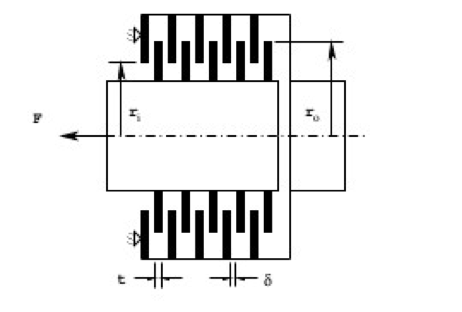


Two-conflicting objectives are considered: (i) minimization of mass ($f_1$ in kg) of the brake system and (ii) minimization of stopping time ($f_2$ in s).

There are five decision variables: $x = (r_i , r_o , t, F, Z)$, where $r_i$ in [60, 80] (in steps of one) is the inner radius in mm, $r_o$ in [90, 110] (in steps of one) is the outer radius in mm, $t$ in [1.5, 3] (in steps of 0.5) is the thickness of discs in mm, $F$ in [600, 1000] (in steps of 10) is the actuating force in N and $Z$ in [2, 9] (in steps of one) is the number of friction surfaces (or discs). 

This problem has been implemented for you in `disk_clutch_brake.py`. You may want to look through that code to see how it is possible to deal with a problem with fixed values for the decision variables such as this one.

This will attempt to optimize the five variables to minimize the two objectives.
- Is the algorithm able to find reasonable solutions to this problem? Use what you have learned about population sizes and number of generations to improve the quality of the found solutions. (NOTE: Do not make them too big or you will have to wait a long time to obtain results!)

Now that you are solving a *'real'* problem it is useful to examine the results. Inspect the final Pareto-front from a successful optimization run.

- Do you see any patterns in the Pareto-optimal solutions that may help you in designing a well-performing disk-brake in the future?


The final population and fitness values are saved in `exercise_3.csv` in the form \{$r_i$, $r_o$, $t$, $F$, $Z$, $mass$, $time$\}, one line for each solution in the Pareto front. You may want to try plotting these data in different ways to gain further insights. This process is what Deb has dubbed *'innovization'*.

----

[1]:
Deb, K., and Srinivasan, A. Innovization: Innovating design principles through optimization. Proceedings of the 8th annual conference on Genetic and evolutionary computation. ACM, 2006.

In [4]:
from functools import reduce
from inspyred.ec import variators
from utils.utils_04.disk_clutch_brake import DiskClutchBrake, disk_clutch_brake_mutation

Final Population
 [[  80.    91.     1.5 1000.     8. ]
 [  80.    92.     1.5 1000.     9. ]
 [  80.    91.     1.5 1000.     9. ]
 [  80.    90.     1.5 1000.     8. ]
 [  80.    90.     1.5 1000.     7. ]
 [  80.    91.     1.5 1000.     7. ]
 [  80.    90.     1.5 1000.     5. ]
 [  80.    96.     1.5 1000.     9. ]
 [  80.    93.     1.5 1000.     9. ]
 [  80.    90.     1.5 1000.     2. ]
 [  80.    90.     1.5 1000.     9. ]
 [  80.    95.     1.5 1000.     9. ]
 [  80.    91.     1.5 1000.     4. ]
 [  80.    98.     1.5 1000.     9. ]
 [  80.    99.     1.5 1000.     9. ]
 [  80.    90.     1.5 1000.     4. ]
 [  80.    90.     1.5 1000.     3. ]
 [  80.    94.     1.5 1000.     9. ]
 [  80.    97.     1.5 1000.     9. ]
 [  80.    90.     1.5 1000.     6. ]
 [  80.    91.     1.5 1000.     2. ]
 [  80.    91.     1.5 1000.     6. ]
 [  80.   104.     1.5 1000.     9. ]
 [  80.    91.     1.5 1000.     5. ]
 [  80.    93.     1.5 1000.     2. ]
 [  80.   101.     1.5 1000.    

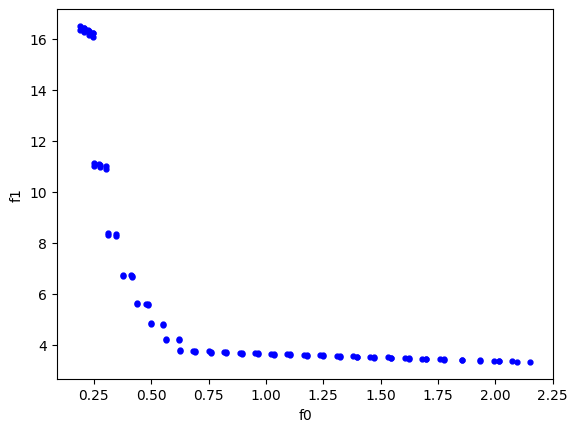

In [5]:
display = True

# parameters for NSGA-2
args = {}
args["pop_size"] = 100
args["max_generations"] = 100
constrained = False

"""
-------------------------------------------------------------------------
"""

problem = DiskClutchBrake(constrained)
if constrained :
    args["constraint_function"] = problem.constraint_function
args["objective_1"] = "Brake Mass (kg)"
args["objective_2"] = "Stopping Time (s)"

args["variator"] = [variators.blend_crossover,disk_clutch_brake_mutation]

args["fig_title"] = 'NSGA-2'

seed = None
rng = NumpyRandomWrapper(seed)

final_pop, final_pop_fitnesses = multi_objective.run_nsga2(rng, problem, display=display, 
                                     num_vars=5, **args)

print("Final Population\n", final_pop)
print()
print("Final Population Fitnesses\n", final_pop_fitnesses)

output = open("exercise_3.csv", "w")
for individual, fitness in zip(final_pop, final_pop_fitnesses) :
    output.write(reduce(lambda x,y : str(x) + "," + str(y), 
                        individual))
    output.write(",")
    output.write(reduce(lambda x,y : str(x) + "," + str(y), 
                        fitness))
    output.write("\n")
output.close()

ioff()
show()

## Instructions and questions

Concisely note down your observations from the previous exercises (follow the bullet points) and think about the following questions. 

- When do you think it is appropriate to use a multi-objective evolutionary algorithm vs. combining multiple objectives into a single fitness function?
- What can the results of a multi-objective algorithm teach us about exploring the design spaces of engineering problems?
- In biological evolution it is possible to think of many phenotypic traits that contribute to the ultimate fitness of an organism (try to enumerate some of these). What (if any) relevance do multi-objective evolutionary algorithms have to biology?